This notebook show an example on how to train a lgsegmentor multi-axis multi-plane Unet and MLP classifer (lgsegmentor) from a single data volume with 3 classes

In [1]:
import numpy as np
import tifffile
import napari
import leopardgecko.segmentor as lgs

import logging
logging.basicConfig(level=logging.INFO)

# Load data and respective labels

data and labels filenames as a tuple. This is not required but it makes it easier to setup training with multiple volumes

In [2]:
data_labels_fn=[
    ("test_data/TS_0005_crop.tif", "test_data/TS_0005_ribos_membr_crop.tif"),
]

In [3]:
traindatas=[]
trainlabels=[]

for datafn0, labelfn0 in data_labels_fn:
     #Make sure data and labels are curated in the correct data format
    traindatas.append(tifffile.imread(datafn0))
    trainlabels.append(tifffile.imread(labelfn0)) #In this case labels are already in uint8

# Setup lg segmentor

In [4]:
#Create the class
lgsegmentor0 = lgs.cMultiAxisRotationsSegmentor()

Check default settings and modify as needed

In [5]:
lgsegmentor0.NN1_train_settings #default NN1 settings

namespace(data_im_dirname='data',
          seg_im_out_dirname='seg',
          model_output_fn='trained_2d_model',
          clip_data=False,
          st_dev_factor=2.575,
          data_hdf5_path='/data',
          seg_hdf5_path='/data',
          training_axes='All',
          image_size=256,
          downsample=False,
          training_set_proportion=0.8,
          cuda_device=0,
          num_cyc_frozen=8,
          num_cyc_unfrozen=5,
          patience=3,
          loss_criterion='DiceLoss',
          alpha=0.75,
          beta=0.25,
          eval_metric='MeanIoU',
          pct_lr_inc=0.3,
          starting_lr='1e-6',
          end_lr=50,
          lr_find_epochs=1,
          lr_reduce_factor=500,
          plot_lr_graph=False,
          model={'type': 'U_Net',
                 'encoder_name': 'resnet34',
                 'encoder_weights': 'imagenet'})

Note that clip_data is false by default.

In [6]:
lgsegmentor0.NN1_train_settings.image_size=256 # size for unet input. Images with different pixelsize will be resized before training

lgsegmentor0.NN1_train_settings.clip_data=True #  Data has negative values so either we normalise to int or we can set clip_data to True
#lgsegmentor0.NN1_train_settings.clip_data=False # data has already been normalised, so clipping is not needed, neither is desired

lgsegmentor0.NN1_train_settings.num_cyc_frozen=10
lgsegmentor0.NN1_train_settings.num_cyc_unfrozen=8

In [7]:
lgsegmentor0.NN2_settings

namespace(hidden_layer_sizes=[10, 10],
          activation='tanh',
          random_state=1,
          verbose=True,
          learning_rate_init=0.001,
          solver='sgd',
          max_iter=1000,
          ntrain=262144)

Set CUDA device.

To change cuda device don't change with .cuda_device, but rather use setcudadevice(devnumber)

You may want to check usage and memory-usage with command `!nvidia-smi` to see what is available before starting training

In [8]:
!nvidia-smi

Fri Oct 20 23:02:29 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-PCIE...  On   | 00000000:00:05.0 Off |                    0 |
| N/A   62C    P0   207W / 250W |  29897MiB / 32510MiB |    100%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-PCIE...  On   | 00000000:00:06.0 Off |                    0 |
| N/A   

In [10]:
lgsegmentor0.set_cuda_device(1)

Start training. It will take a while and will print a lot of messages. At the end `res` will contain metrics information

In [11]:
res= lgsegmentor0.train(traindatas, trainlabels, get_metrics=True)


INFO:root:traindata and trainlabels are list
INFO:root:nsets:1
INFO:root:tempdir_data_path:/tmp/tmpgjk3m74t
INFO:root:tempdir_seg_path:/tmp/tmpbqagsrfz
INFO:root:Calculating mean of data...
INFO:root:Mean value: 3.455104887485504
INFO:root:Calculating standard deviation.
INFO:root:Std dev: 22.350231922160148. Calculating stats.
INFO:root:Lower bound: -54.096742312076884, upper bound: 61.00695208704789
INFO:root:Number of voxels above upper bound to be clipped 82108 - percentage 0.489%
INFO:root:Number of voxels below lower bound to be clipped 174907 - percentage 1.043%
INFO:root:Rescaling intensities.
INFO:root:Data is already in integer dtype, converting to float for rescaling.
INFO:root:Converting to uint8.
INFO:root:Number of classes in segmentation dataset: 3
INFO:root:These classes are: [0 1 2]
INFO:root:Slicing data volume and saving slices to disk
100%|██████████| 768/768 [00:05<00:00, 152.41it/s]
INFO:root:Slicing label volume and saving slices to disk
100%|██████████| 768/768 

Iteration 1, loss = 0.23933155
Iteration 2, loss = 0.18245780
Iteration 3, loss = 0.16407723
Iteration 4, loss = 0.15564125
Iteration 5, loss = 0.14909055
Iteration 6, loss = 0.14392948
Iteration 7, loss = 0.14001008
Iteration 8, loss = 0.13712783
Iteration 9, loss = 0.13492790
Iteration 10, loss = 0.13322200
Iteration 11, loss = 0.13189054
Iteration 12, loss = 0.13082119
Iteration 13, loss = 0.12990913
Iteration 14, loss = 0.12912137
Iteration 15, loss = 0.12842959
Iteration 16, loss = 0.12781964
Iteration 17, loss = 0.12727636
Iteration 18, loss = 0.12680238
Iteration 19, loss = 0.12634284
Iteration 20, loss = 0.12593434
Iteration 21, loss = 0.12555756
Iteration 22, loss = 0.12520426
Iteration 23, loss = 0.12490049
Iteration 24, loss = 0.12461034
Iteration 25, loss = 0.12433319
Iteration 26, loss = 0.12405325
Iteration 27, loss = 0.12381445
Iteration 28, loss = 0.12359546
Iteration 29, loss = 0.12337647
Iteration 30, loss = 0.12316604
Iteration 31, loss = 0.12298495
Iteration 32, los

INFO:root:NN2 train score:0.9552459716796875
INFO:root:Preparing to predict the whole training volume
INFO:root:Data type is numpy.ndarray


[########################################] | 100% Completed | 4.38 sms


INFO:root:MetricScoreOfVols_Accuracy()
INFO:root:MetricScoreOfVols_Dice()
INFO:root:Number of class segmentations in first volume 3
INFO:root:Number of class segmentations in second volume 3
INFO:root:Calculating using numpy
INFO:root:dicescores = {1: 0.46058788488794855, 2: 0.7838015736361457}
INFO:root:set 0, NN2 acc:0.9550736546516418, dice:(0.6221947292620471, {1: 0.46058788488794855, 2: 0.7838015736361457})


# Save model

It is good  practise to save with the date that the model was created

In [12]:
# lgsegmentor0.save_model("2023_06_12_endometrium.lgsegmod")
import datetime
model_save_fn = f"{datetime.date.today()}_ribos_membr.lgsegmod" #Choose correct description
lgsegmentor0.save_model(model_save_fn)

# Check how training metrics progressed during UNet training

plot should look like a exponential decaying to zero for both the training and validation loss

INFO:root:Saving figure of training/validation losses to 2023-10-20_ribos_membr_loss_plot.png


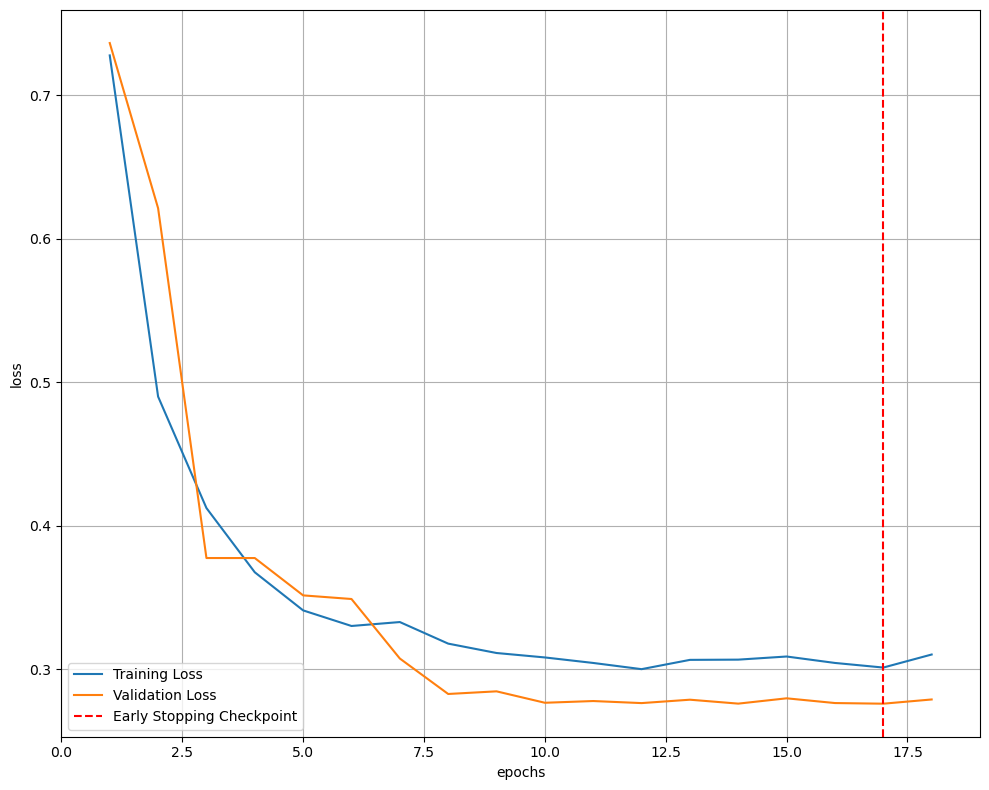

In [22]:
from pathlib import Path
lgsegmentor0.trainer.output_loss_fig(Path(model_save_fn))

# Training metrics

In [14]:
res

([[0.9497919082641602,
   (0.6248313844348183, {1: 0.5248780244227103, 2: 0.7247847444469265})],
  [0.9431583881378174,
   (0.5218345361287452, {1: 0.4416904980081336, 2: 0.6019785742493567})],
  [0.9427548050880432,
   (0.49336367155780997, {1: 0.34862151963429056, 2: 0.6381058234813294})],
  [0.9478611946105957,
   (0.5908288830769005, {1: 0.4925699634498936, 2: 0.6890878027039073})],
  [0.9408658742904663,
   (0.46742563937547266, {1: 0.40878529742997505, 2: 0.5260659813209703})],
  [0.9398422241210938,
   (0.457345431419258, {1: 0.318974825747352, 2: 0.595716037091164})],
  [0.9470621943473816,
   (0.585826063966944, {1: 0.4955608776640782, 2: 0.6760912502698099})],
  [0.9412607550621033,
   (0.4685759798149536, {1: 0.408804506451975, 2: 0.5283474531779322})],
  [0.9404314756393433,
   (0.4564681350216233, {1: 0.32687872004662205, 2: 0.5860575499966245})],
  [0.949783444404602,
   (0.6172229131163276, {1: 0.5177700054442049, 2: 0.7166758207884502})],
  [0.943814754486084,
   (0.530

First element are accuracy and dice scores for NN1 predicted volumes, in each axis/direction

Second element are similar metrics but after the NN2 (complete lgsegmentor) inference (single volume).

In [15]:
res[0] #NN1 metrics

[[0.9497919082641602,
  (0.6248313844348183, {1: 0.5248780244227103, 2: 0.7247847444469265})],
 [0.9431583881378174,
  (0.5218345361287452, {1: 0.4416904980081336, 2: 0.6019785742493567})],
 [0.9427548050880432,
  (0.49336367155780997, {1: 0.34862151963429056, 2: 0.6381058234813294})],
 [0.9478611946105957,
  (0.5908288830769005, {1: 0.4925699634498936, 2: 0.6890878027039073})],
 [0.9408658742904663,
  (0.46742563937547266, {1: 0.40878529742997505, 2: 0.5260659813209703})],
 [0.9398422241210938,
  (0.457345431419258, {1: 0.318974825747352, 2: 0.595716037091164})],
 [0.9470621943473816,
  (0.585826063966944, {1: 0.4955608776640782, 2: 0.6760912502698099})],
 [0.9412607550621033,
  (0.4685759798149536, {1: 0.408804506451975, 2: 0.5283474531779322})],
 [0.9404314756393433,
  (0.4564681350216233, {1: 0.32687872004662205, 2: 0.5860575499966245})],
 [0.949783444404602,
  (0.6172229131163276, {1: 0.5177700054442049, 2: 0.7166758207884502})],
 [0.943814754486084,
  (0.5300974393220452, {1: 0.4

In [16]:
res[1] #NN2 metrics

([0.9550736546516418],
 [(0.6221947292620471, {1: 0.46058788488794855, 2: 0.7838015736361457})])

We can also get some information of the NN1 predictions by looking at the dataframe that it generates

In [17]:
lgsegmentor0.all_nn1_pred_pd

,pred_data_probs_filenames,pred_data_labels_filenames,pred_sets,pred_planes,pred_rots,pred_ipred,pred_shapes,accuracy,dice
0,/tmp/tmpg4bnlsi7/pred_0_YX_0.h5,/tmp/tmpg4bnlsi7/pred_0_YX_labels_0.h5,0,YX,0,0,"(256, 256, 256)",0.949792,0.624831
1,/tmp/tmpg4bnlsi7/pred_0_ZX_0.h5,/tmp/tmpg4bnlsi7/pred_0_ZX_labels_0.h5,0,ZX,0,1,"(256, 256, 256)",0.943158,0.521835
2,/tmp/tmpg4bnlsi7/pred_0_ZY_0.h5,/tmp/tmpg4bnlsi7/pred_0_ZY_labels_0.h5,0,ZY,0,2,"(256, 256, 256)",0.942755,0.493364
3,/tmp/tmpg4bnlsi7/pred_0_YX_90.h5,/tmp/tmpg4bnlsi7/pred_0_YX_labels_90.h5,0,YX,90,3,"(256, 256, 256)",0.947861,0.590829
4,/tmp/tmpg4bnlsi7/pred_0_ZX_90.h5,/tmp/tmpg4bnlsi7/pred_0_ZX_labels_90.h5,0,ZX,90,4,"(256, 256, 256)",0.940866,0.467426
5,/tmp/tmpg4bnlsi7/pred_0_ZY_90.h5,/tmp/tmpg4bnlsi7/pred_0_ZY_labels_90.h5,0,ZY,90,5,"(256, 256, 256)",0.939842,0.457345
6,/tmp/tmpg4bnlsi7/pred_0_YX_180.h5,/tmp/tmpg4bnlsi7/pred_0_YX_labels_180.h5,0,YX,180,6,"(256, 256, 256)",0.947062,0.585826
7,/tmp/tmpg4bnlsi7/pred_0_ZX_180.h5,/tmp/tmpg4bnlsi7/pred_0_ZX_labels_180.h5,0,ZX,180,7,"(256, 256, 256)",0.941261,0.468576
8,/tmp/tmpg4bnlsi7/pred_0_ZY_180.h5,/tmp/tmpg4bnlsi7/pred_0_ZY_labels_180.h5,0,ZY,180,8,"(256, 256, 256)",0.940431,0.456468
9,/tmp/tmpg4bnlsi7/pred_0_YX_270.h5,/tmp/tmpg4bnlsi7/pred_0_YX_labels_270.h5,0,YX,270,9,"(256, 256, 256)",0.949783,0.617223


We can average the NN1 metrics and compare with the complete lgsegmentor

In [18]:
nn1_acc_avg= np.mean( [el0[0] for el0 in res[0]])
nn1_dice_avg= np.nanmean(np.array( [el0[1][0] for el0 in res[0]] ))

nn1nn2_acc_avg = np.mean(np.array(res[1][0]))
nn1nn2_dice_avg =np.nanmean( [dice_info[0] for dice_info in res[1][1]] )

Dice metrics, vs-predictions (nn1) and lg-predictions (nn1 followed by nn2)

In [19]:
print(nn1_dice_avg)
print(nn1nn2_dice_avg)

0.5242136007536231
0.6221947292620471


There is a good improvement if the NN2 (MLP classifier) is used with multiple axis and rotations predictions compared with a single axis and rotation prediction.

Now let's compare *accuracy* metric

In [20]:
print(nn1_acc_avg)
print(nn1nn2_acc_avg)

0.9439973086118698
0.9550736546516418


Accuracy is not a great metric unless the background is much smaller, but we can also see a small improvement.

# Cleanup

Training and predictions within it gemerate a lot of tempprary files. Delete them by running cleanup()

In [21]:
lgsegmentor0.cleanup()